In [151]:
! pip install pycaret

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as py
from io import BytesIO

In [153]:
# import du dataset dans une variable et affichage les lignes du dataset
data = pd.read_csv("insurance.csv")
data


age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [154]:
# Connaitre les dimensions du dataset
data.shape

(1338, 7)

In [155]:
# Vérification des lignes dupliquées
data_duplicated = data.duplicated()
data_duplicated.value_counts()

False    1337
True        1
Name: count, dtype: int64

In [156]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [157]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [158]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [159]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [160]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data.smoker = le.fit_transform (data.smoker)
data

age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

In [161]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [162]:
data.groupby('region').size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [163]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [164]:
# Vérification des lignes nulles
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [165]:
data.describe()

age          bmi     children       smoker       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918     0.204783  13270.422265
std      14.049960     6.098187     1.205493     0.403694  12110.011237
min      18.000000    15.960000     0.000000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000     0.000000   4740.287150
50%      39.000000    30.400000     1.000000     0.000000   9382.033000
75%      51.000000    34.693750     2.000000     0.000000  16639.912515
max      64.000000    53.130000     5.000000     1.000000  63770.428010

In [166]:
data

age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0       1  southwest  16884.92400
1      18    male  33.770         1       0  southeast   1725.55230
2      28    male  33.000         3       0  southeast   4449.46200
3      33    male  22.705         0       0  northwest  21984.47061
4      32    male  28.880         0       0  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3       0  northwest  10600.54830
1334   18  female  31.920         0       0  northeast   2205.98080
1335   18  female  36.850         0       0  southeast   1629.83350
1336   21  female  25.800         0       0  southwest   2007.94500
1337   61  female  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

<Axes: ylabel='age'>

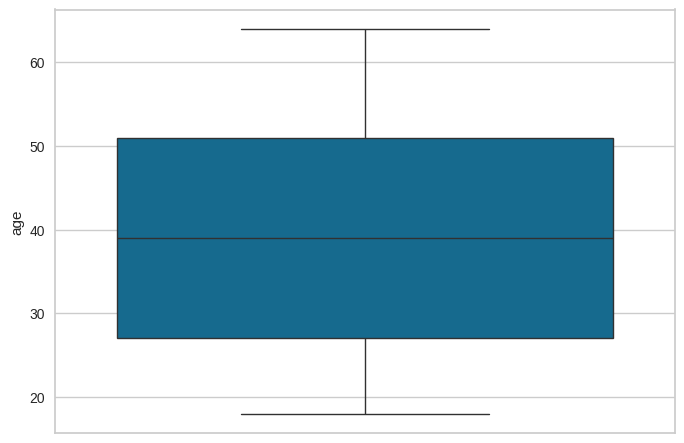

In [167]:
sns.boxplot(y= 'age', data=data)

<Axes: ylabel='bmi'>

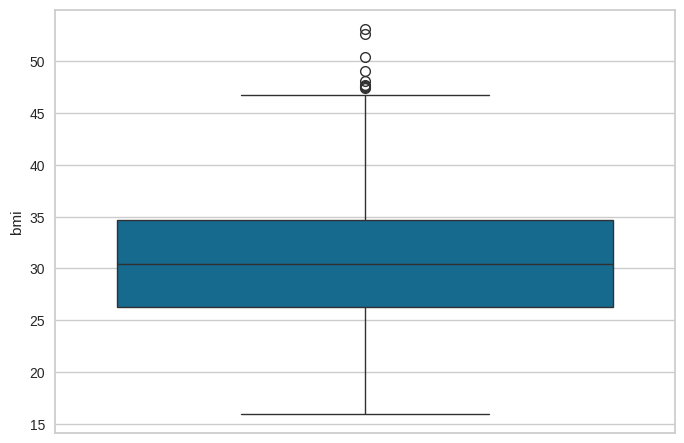

In [168]:
sns.boxplot(y= 'bmi', data=data)

In [169]:
## gestion de bmi


Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
IQR

k = 1.5
lower_limit = Q1 - k * IQR
upper_limit = Q3 + k * IQR
print ('les results sont', upper_limit, lower_limit)

les results sont 47.290000000000006 13.7


In [170]:

outliers = data[(data['bmi'] < lower_limit) | (data['bmi'] > upper_limit)]
num_outliers = len(outliers)
print("Nombre d'outliers dans la colonne 'bmi':", num_outliers)

Nombre d'outliers dans la colonne 'bmi': 9


In [171]:
outliers = data[(data['bmi'] < lower_limit) | (data['bmi'] > upper_limit)]
num_outliers = len(outliers)
print("Nombre d'outliers dans la colonne 'bmi':", num_outliers)

#  Sélectionner les outliers contigus dans la première plage
outliers = data[(data['bmi'] < lower_limit) | (data['bmi'] > upper_limit)]
len(outliers)


# Afficher la taille des deux groupes
print("Nombre d'outliers :", len(outliers))


# Supprimer les outliers non contigus du DataFrame principal
data.drop(outliers.index, inplace=True)

Nombre d'outliers dans la colonne 'bmi': 9
Nombre d'outliers : 9


<Axes: ylabel='bmi'>

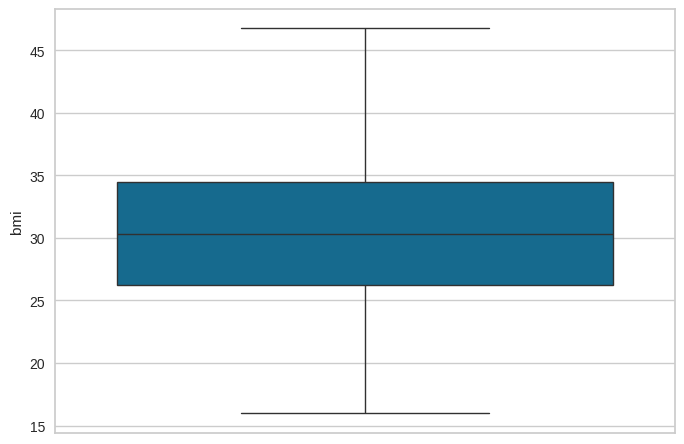

In [172]:
sns.boxplot(y='bmi', data=data)

<Axes: ylabel='region'>

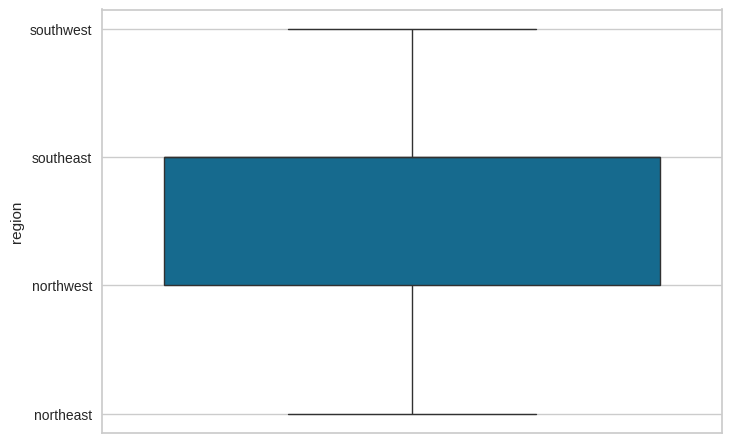

In [173]:
sns.boxplot(y='region', data=data)

<Axes: ylabel='children'>

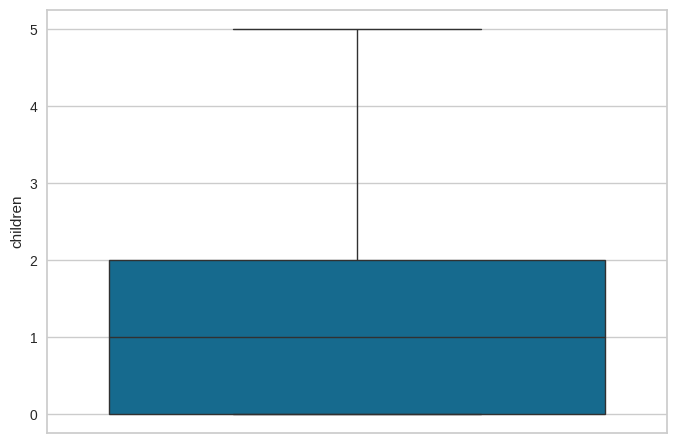

In [174]:
sns.boxplot(y= 'children', data=data)

<Axes: ylabel='charges'>

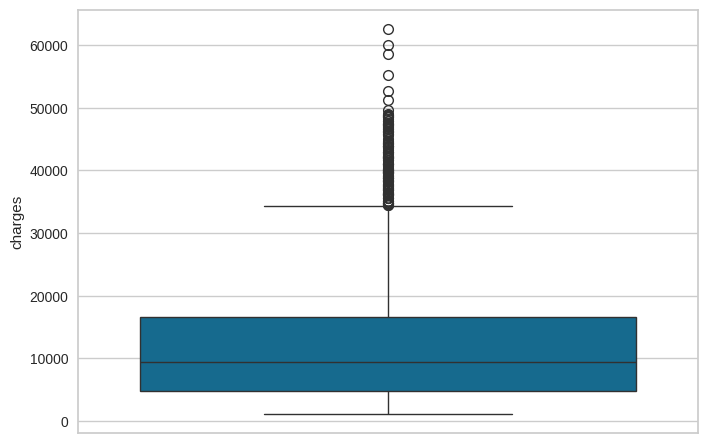

In [175]:
sns.boxplot(y= 'charges', data=data)

Utilisation de pycaret

In [176]:
## gestion de charges


Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
IQR

11848.22951

In [177]:
k = 1.5
lower_limit = Q1 - k * IQR
upper_limit = Q3 + k * IQR
print ('les results sont', upper_limit, lower_limit)

les results sont 34358.841975 -13034.076065


In [178]:
outliers = data[(data['charges'] < lower_limit) | (data['charges'] > upper_limit)]
num_outliers = len(outliers)
print("Nombre d'outliers dans la colonne 'charges':", num_outliers)

Nombre d'outliers dans la colonne 'charges': 138


In [179]:
#  Sélectionner les outliers contigus dans la première plage
outliers = data[(data['charges'] < lower_limit) | (data['charges'] > upper_limit)]
len(outliers)


# Afficher la taille des deux groupes
print("Nombre d'outliers :", len(outliers))


# Supprimer les outliers non contigus du DataFrame principal
data.drop(outliers.index, inplace=True)

Nombre d'outliers : 138


<Axes: ylabel='charges'>

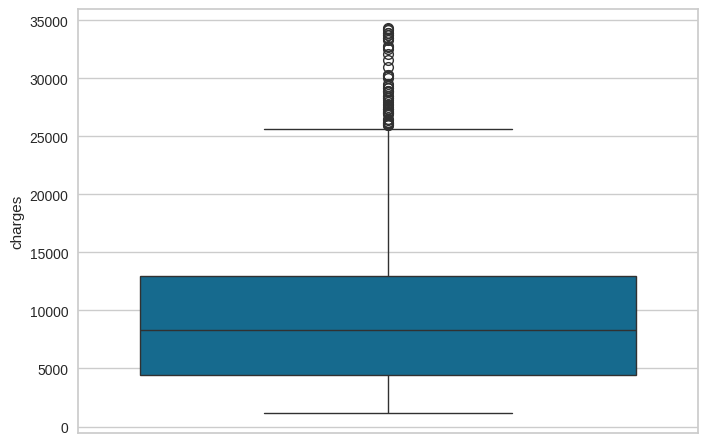

In [180]:
sns.boxplot(y='charges', data=data)

<Axes: ylabel='smoker'>

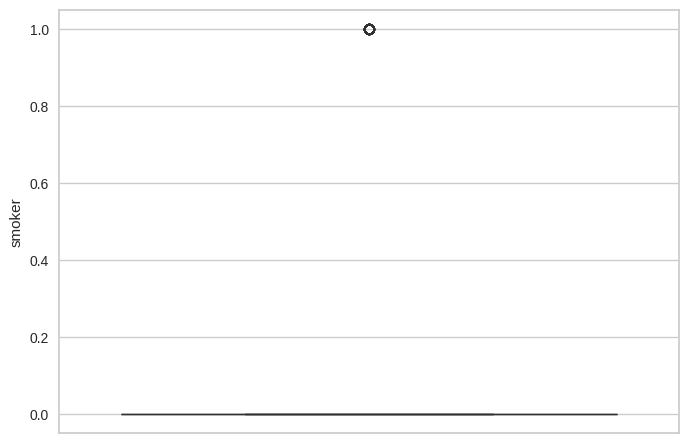

In [181]:
sns.boxplot(y='smoker', data=data)

In [182]:
# configuration de  l'environnement PyCaret pour la régression
from pycaret.regression import*
# minmax :methode de normalisation utilisée
s = setup(data,target='charges',train_size=0.8,session_id=123,normalize=True,normalize_method='minmax')

In [183]:
get_config('X_train_transformed')

age  sex       bmi  children  smoker  region_northeast  \
825   1.000000  0.0  0.515265       0.4     0.0               1.0   
194   0.000000  1.0  0.599870       0.0     0.0               0.0   
1058  0.130435  0.0  0.764209       0.0     0.0               0.0   
821   0.173913  1.0  0.055538       0.0     0.0               0.0   
994   0.195652  0.0  0.132673       0.6     1.0               0.0   
...        ...  ...       ...       ...     ...               ...   
112   0.413043  1.0  0.481975       0.0     0.0               0.0   
1286  0.217391  0.0  0.043196       0.0     0.0               1.0   
124   0.630435  0.0  0.583144       0.6     0.0               0.0   
1171  0.543478  0.0  0.348815       0.4     1.0               0.0   
1260  0.304348  0.0  0.148100       0.0     0.0               1.0   

      region_southeast  region_northwest  region_southwest  
825                0.0               0.0               0.0  
194                1.0               0.0               0.0  
1058               1.0               0.0               0.0  
821                0.0               1.0               0.0  
994                0.0               1.0               0.0  
...                ...               ...               ...  
112                0.0               0.0               1.0  
1286               0.0               0.0               0.0  
124                0.0               1.0               0.0  
1171               0.0               0.0               1.0  
1260               0.0               0.0               0.0  

[952 rows x 9 columns]

In [184]:
compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(random_state=123)

In [185]:
# crossvalidation
# création du modèle de régression Gradient Boosting Regressor (GBR) en utilisant la fonction create_model() de PyCaret.
best = create_model('gbr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [186]:
evaluate_model(best)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [189]:
import pickle


In [191]:
pickle.dump(best, open('assurance.pkl', 'wb'))